In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import sklearn.metrics as metrics
# from scipy.stats import ttest_ind
import numpy as np
import os
os.chdir('..')
from PairingVDJdb_MI import _define_individuals
import functions.myfunctions as mf
import functions.helperfunctions as hf
pd.options.mode.chained_assignment = None

In [2]:
vdj = pd.read_csv('data/vdj_cleaned_subset_for_MI.csv', index_col=0).drop('Unnamed: 0', axis=1)
vdj = vdj.replace('https://www.10xgenomics.com/resources/application-notes/a-new-way-of-exploring-immunity-linking-highly-multiplexed-antigen-recognition-to-immune-repertoire-and-phenotype/#', '10xGenomics')
vdj = vdj.replace('https://github.com/antigenomics/vdjdb-db/issues/*', 'GitHubIssue', regex=True)
vdj = vdj.loc[vdj['Epitope'] != 'KLGGALQAK'] # because too big - takes forever
epitopes = vdj['Epitope'].unique().tolist()
# epcounts = vdj['Epitope'].value_counts()
# epitopes = epcounts.loc[epcounts<1000].index.values
# vdj = vdj.loc[vdj['Epitope'].isin(epitopes)]

In [3]:
ff1 = 'data/output/pairing_GAMI/all_eps_L06/'
ff11 = 'data/output/pairing_GAMI/big_eps_700_L06/'
ff2 = 'data/output/pairing_GAMI/all_eps_L1/'
ff22 = 'data/output/pairing_GAMI/big_eps_700_L1/'
save_folder = 'figures'

In [4]:
import time

In [5]:
mode_results = pd.DataFrame()

for ff in sorted(os.listdir(ff1)):
    if 'vgene-no' in ff:
         print(ff)
         t = time.time()
         filename = ff1+ff
         
         print(time.time()-t)

         f1 = ff.replace('prop_test', 'propTest')
         f1 = f1.replace('GA_repeats', 'GArepeats')
         f1 = f1.replace('MI_repeats', 'MIrepeats')
         f1 = f1.replace('distance_type', 'disttype')
         properties = {x.split('-')[0]:x.split('-')[1] for x in f1.split('_') if '.csv' not in x}
         if properties['epitope'] in epitopes:
            epdf = _define_individuals(vdj, properties['epitope'], 'no')
            epdf = mf.prepare_data(epdf, col1='cdr3a_IMGTgaps', col2 ='cdr3b_IMGTgaps')
            df = hf.load_df(filename, epdf.shape[0])
            a = np.array(epdf['cdr3a_IMGTgaps_padded'].str.split(', ', expand=True))
            a = a[:, ~np.all(a[1:] == a[:-1], axis=0)] # remove columns where all values are equal to first value
            epdf['alpha'] = [''.join(x) for x in a] # then substitute original column
            a = np.array(epdf['cdr3b_IMGTgaps_padded'].str.split(', ', expand=True))
            a = a[:, ~np.all(a[1:] == a[:-1], axis=0)] # remove columns where all values are equal to first value
            epdf['beta'] = [''.join(x) for x in a] # then substitute original column         
            
            t = time.time()
            df_final = hf.check_mode_correct_IPA(df.reset_index(),epdf)
            print(time.time()-t)
            df_mode = df_final[['mode_freq','correct']]
            df_mode['L'] = properties['L']
            df_mode['epitope'] = properties['epitope']
            mode_results = pd.concat([mode_results,df_mode])

            # fig, ax = plt.subplots(ncols=2, figsize=(10,4))
            # sns.histplot(data=df_final, x='mode_freq', hue='correct', hue_order=[False, True], palette=['aliceblue','royalblue'],
            #       multiple='stack', binwidth=1, binrange=(-0.5,10.5), ax=ax[0])
            # sns.histplot(data=df_final, x='mode_freq', hue='correct', hue_order=[False, True], palette=['aliceblue','royalblue'],
            #       multiple='fill', binwidth=1, binrange=(-0.5,10.5), ax=ax[1])
            # fig.suptitle(properties['epitope'] + ', ' + properties['confidence'] + ', ' + properties['L'], fontsize=16)
            # handles = ax[0].get_legend().legendHandles
            # labels = ['Mode not correct', 'Mode correct']
            # fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor = [0.5,-0.05], fontsize=14)
            # ax[0].set_xlabel('Frequency of mode', fontdict={'size':14})
            # ax[0].set_ylabel('Count at frequency', fontdict={'size':14})
            # ax[1].set_xlabel('Frequency of mode', fontdict={'size':14})
            # ax[1].set_ylabel('Proportion at frequency', fontdict={'size':14})
            # ax[0].get_legend().remove()
            # ax[1].get_legend().remove()
            # plt.tight_layout()
            #    plt.savefig(save_folder + properties['epitope'] + '_' + properties['confidence'] + '_' + properties['L'] + '_mode_correctness.png',
            #                bbox_inches="tight")
            # plt.show()

epitope-ASNENMETM_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_GAthresh-0.95_repairing-True_kNN-_distance_type-_GA_repeats-100_MI_repeats-10.csv.gz
2.384185791015625e-06
Using individuals as provided
[34]
(2010, 11)
[34]
elapsed: 1.4562203884124756
0.17018508911132812
epitope-ATDALMTGF_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_GAthresh-0.95_repairing-True_kNN-_distance_type-_GA_repeats-100_MI_repeats-10.csv.gz
1.1920928955078125e-06
Using individuals as provided
[21]
(1250, 11)
[21]
elapsed: 3.774247646331787
0.09897327423095703
epitope-CINGVCWTV_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_GAthresh-0.95_repairing-True_kNN-_distance_type-_GA_repeats-100_MI_repeats-10.csv.gz
1.1920928955078125e-06
Using individuals as provided
[38]
(2260, 11)
[38]
elapse

In [6]:
for ff110 in sorted(os.listdir(ff11)):
    if '.txt' not in ff110:
        for ff in os.listdir(ff11+ff110):
            if ('.csv' in ff) & ('vgene-no' in ff) & ('KLGGALQAK' not in ff):
                print(ff)
                filename = ff11 + ff110 + '/'+ff
            #    print(df)

                f1 = ff.replace('prop_test', 'propTest')
                f1 = f1.replace('GA_repeats', 'GArepeats')
                f1 = f1.replace('MI_repeats', 'MIrepeats')
                f1 = f1.replace('distance_type', 'disttype')
                properties = {x.split('-')[0]:x.split('-')[1] for x in f1.split('_') if '.csv' not in x}
                if properties['epitope'] in epitopes:
                    df1 = pd.read_csv('data/big_epitopes_subsamples_700/' + properties['epitope'] + '_ss' + ff110 + '.csv')
                    epdf = _define_individuals(df1, properties['epitope'], 'no')
                    epdf = mf.prepare_data(epdf, col1='cdr3a_IMGTgaps', col2 ='cdr3b_IMGTgaps')
                    df = hf.load_df(filename, epdf.shape[0])
                    a = np.array(epdf['cdr3a_IMGTgaps_padded'].str.split(', ', expand=True))
                    a = a[:, ~np.all(a[1:] == a[:-1], axis=0)] # remove columns where all values are equal to first value
                    epdf['alpha'] = [''.join(x) for x in a] # then substitute original column
                    a = np.array(epdf['cdr3b_IMGTgaps_padded'].str.split(', ', expand=True))
                    a = a[:, ~np.all(a[1:] == a[:-1], axis=0)] # remove columns where all values are equal to first value
                    epdf['beta'] = [''.join(x) for x in a] # then substitute original column         

                    df_final = hf.check_mode_correct_IPA(df.reset_index(),epdf)
                    df_mode = df_final[['mode_freq','correct']]
                    df_mode['L'] = properties['L']
                    df_mode['epitope'] = properties['epitope'] + '_' + ff110
                    mode_results = pd.concat([mode_results,df_mode])

                    # fig, ax = plt.subplots(ncols=2, figsize=(10,4))
                    # sns.histplot(data=df_final, x='mode_freq', hue='correct', hue_order=[False, True], palette=['aliceblue','royalblue'],
                    #       multiple='stack', binwidth=1, binrange=(-0.5,10.5), ax=ax[0])
                    # sns.histplot(data=df_final, x='mode_freq', hue='correct', hue_order=[False, True], palette=['aliceblue','royalblue'],
                    #       multiple='fill', binwidth=1, binrange=(-0.5,10.5), ax=ax[1])
                    # fig.suptitle(properties['epitope'] + ', ' + properties['confidence'] + ', ' + properties['L'], fontsize=16)
                    # handles = ax[0].get_legend().legendHandles
                    # labels = ['Mode not correct', 'Mode correct']
                    # fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor = [0.5,-0.05], fontsize=14)
                    # ax[0].set_xlabel('Frequency of mode', fontdict={'size':14})
                    # ax[0].set_ylabel('Count at frequency', fontdict={'size':14})
                    # ax[1].set_xlabel('Frequency of mode', fontdict={'size':14})
                    # ax[1].set_ylabel('Proportion at frequency', fontdict={'size':14})
                    # ax[0].get_legend().remove()
                    # ax[1].get_legend().remove()
                    # plt.tight_layout()
                    #    plt.savefig(save_folder + properties['epitope'] + '_' + properties['confidence'] + '_' + properties['L'] + '_mode_correctness.png',
                    #                bbox_inches="tight")
                    # plt.show()

epitope-RAKFKQLL_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_GAthresh-0.95_repairing-True_kNN-_distance_type-_GA_repeats-100_MI_repeats-10.csv.gz
Using individuals as provided
[117]
(7000, 11)
[117]
elapsed: 453.40136098861694
epitope-GILGFVFTL_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_GAthresh-0.95_repairing-True_kNN-_distance_type-_GA_repeats-100_MI_repeats-10.csv.gz
Using individuals as provided
[117]
(7000, 11)
[117]
elapsed: 148.78539991378784
epitope-AVFDRKSDAK_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_GAthresh-0.95_repairing-True_kNN-_distance_type-_GA_repeats-100_MI_repeats-10.csv.gz
Using individuals as provided
[117]
(7000, 11)
[117]
elapsed: 226.10921382904053
epitope-RAKFKQLL_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_co

In [7]:
for ff in sorted(os.listdir(ff2)):
    if ('vgene-no' in ff) & ('L-1.0' in ff):
         print(ff)
         filename = ff2+ff
      #    print(df)

         f1 = ff.replace('prop_test', 'propTest')
         f1 = f1.replace('GA_repeats', 'GArepeats')
         f1 = f1.replace('MI_repeats', 'MIrepeats')
         f1 = f1.replace('distance_type', 'disttype')
         properties = {x.split('-')[0]:x.split('-')[1] for x in f1.split('_') if '.csv' not in x}
         if properties['epitope'] in epitopes:
            epdf = _define_individuals(vdj, properties['epitope'], 'no')
            epdf = mf.prepare_data(epdf, col1='cdr3a_IMGTgaps', col2 ='cdr3b_IMGTgaps')
            df = hf.load_df(filename, epdf.shape[0])
            a = np.array(epdf['cdr3a_IMGTgaps_padded'].str.split(', ', expand=True))
            a = a[:, ~np.all(a[1:] == a[:-1], axis=0)] # remove columns where all values are equal to first value
            epdf['alpha'] = [''.join(x) for x in a] # then substitute original column
            a = np.array(epdf['cdr3b_IMGTgaps_padded'].str.split(', ', expand=True))
            a = a[:, ~np.all(a[1:] == a[:-1], axis=0)] # remove columns where all values are equal to first value
            epdf['beta'] = [''.join(x) for x in a] # then substitute original column         

            df_final = hf.check_mode_correct_IPA(df.reset_index(),epdf)
            df_mode = df_final[['mode_freq','correct']]
            df_mode['L'] = properties['L']
            df_mode['epitope'] = properties['epitope']
            mode_results = pd.concat([mode_results,df_mode])


epitope-ASNENMETM_weights-0.6_L-1.0_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_GAthresh-0.95_repairing-True_kNN-_distance_type-_GA_repeats-100_MI_repeats-10.csv.gz
Using individuals as provided
[34]
(2010, 11)
[34]
elapsed: 0.8652133941650391
epitope-ATDALMTGF_weights-0.6_L-1.0_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_GAthresh-0.95_repairing-True_kNN-_distance_type-_GA_repeats-100_MI_repeats-10.csv.gz
Using individuals as provided
[21]
(1250, 11)
[21]
elapsed: 2.9441821575164795
epitope-CINGVCWTV_weights-0.6_L-1.0_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_GAthresh-0.95_repairing-True_kNN-_distance_type-_GA_repeats-100_MI_repeats-10.csv.gz
Using individuals as provided
[38]
(2260, 11)
[38]
elapsed: 8.298789501190186
epitope-ELAGIGILTV_weights-0.6_L-1.0_method-None_prop_test-all_confidence-none_correla

In [8]:
for ff220 in sorted(os.listdir(ff22)):
    if '.txt' not in ff220:
        for ff in os.listdir(ff22+ff220):
            if ('.csv' in ff) & ('vgene-no' in ff) & ('KLGGALQAK' not in ff) & ('L-1.0' in ff):
               print(ff)
               filename = ff22+ff220+'/'+ff
            #    print(df)

               f1 = ff.replace('prop_test', 'propTest')
               f1 = f1.replace('GA_repeats', 'GArepeats')
               f1 = f1.replace('MI_repeats', 'MIrepeats')
               f1 = f1.replace('distance_type', 'disttype')
               properties = {x.split('-')[0]:x.split('-')[1] for x in f1.split('_') if '.csv' not in x}
               if properties['epitope'] in epitopes:
                  df1 = pd.read_csv('data/big_epitopes_subsamples_700/' + properties['epitope'] + '_ss' + ff110 + '.csv')
                  epdf = _define_individuals(df1, properties['epitope'], 'no')
                  epdf = mf.prepare_data(epdf, col1='cdr3a_IMGTgaps', col2 ='cdr3b_IMGTgaps')
                  df = hf.load_df(filename, epdf.shape[0])
                  a = np.array(epdf['cdr3a_IMGTgaps_padded'].str.split(', ', expand=True))
                  a = a[:, ~np.all(a[1:] == a[:-1], axis=0)] # remove columns where all values are equal to first value
                  epdf['alpha'] = [''.join(x) for x in a] # then substitute original column
                  a = np.array(epdf['cdr3b_IMGTgaps_padded'].str.split(', ', expand=True))
                  a = a[:, ~np.all(a[1:] == a[:-1], axis=0)] # remove columns where all values are equal to first value
                  epdf['beta'] = [''.join(x) for x in a] # then substitute original column         

                  df_final = hf.check_mode_correct_IPA(df.reset_index(),epdf)
                  df_mode = df_final[['mode_freq','correct']]
                  df_mode['L'] = properties['L']
                  df_mode['epitope'] = properties['epitope'] + '_' + ff220
                  mode_results = pd.concat([mode_results,df_mode])


epitope-RAKFKQLL_weights-0.6_L-1.0_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_GAthresh-0.95_repairing-True_kNN-_distance_type-_GA_repeats-100_MI_repeats-10.csv.gz
Using individuals as provided
[117]
(7000, 11)
[117]
elapsed: 411.3695480823517
epitope-GILGFVFTL_weights-0.6_L-1.0_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_GAthresh-0.95_repairing-True_kNN-_distance_type-_GA_repeats-100_MI_repeats-10.csv.gz
Using individuals as provided
[117]
(7000, 11)
[117]
elapsed: 129.77125692367554
epitope-AVFDRKSDAK_weights-0.6_L-1.0_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_GAthresh-0.95_repairing-True_kNN-_distance_type-_GA_repeats-100_MI_repeats-10.csv.gz
Using individuals as provided
[117]
(7000, 11)
[117]
elapsed: 184.55499696731567
epitope-RAKFKQLL_weights-0.6_L-1.0_method-None_prop_test-all_confidence-none_cor

In [9]:
gm = mode_results.groupby(['epitope','L','mode_freq','correct']).size().reset_index()
gm1 = gm.groupby(['epitope','L']).sum().reset_index()[['epitope','L',0]]
gm = gm.rename(columns={0:'counts'})
gm1 = gm1.rename(columns={0:'N'})

grouped_mode = pd.merge(gm, gm1)
grouped_mode['prop'] = grouped_mode['counts']/grouped_mode['N']

In [10]:
d = grouped_mode.loc[grouped_mode['L'] == '0.6'][['mode_freq','epitope','prop','counts', 'L']].groupby(['mode_freq','epitope', 'L']).sum().reset_index()
print(d)

     mode_freq     epitope    L      prop  counts
0            1   ATDALMTGF  0.6  0.032000       4
1            1  RAKFKQLL_0  0.6  0.102857      72
2            1  RAKFKQLL_1  0.6  0.095714      67
3            1  RAKFKQLL_2  0.6  0.154286     108
4            1  RAKFKQLL_3  0.6  0.112857      79
..         ...         ...  ...       ...     ...
184         10  SSLENFRAYV  0.6  0.160000      56
185         10    SSPPMFRV  0.6  1.000000     133
186         10   SSYRRPVGI  0.6  1.000000     177
187         10  TTDPSFLGRY  0.6  0.020661       5
188         10   YLQPRTFLL  0.6  0.075075      25

[189 rows x 5 columns]


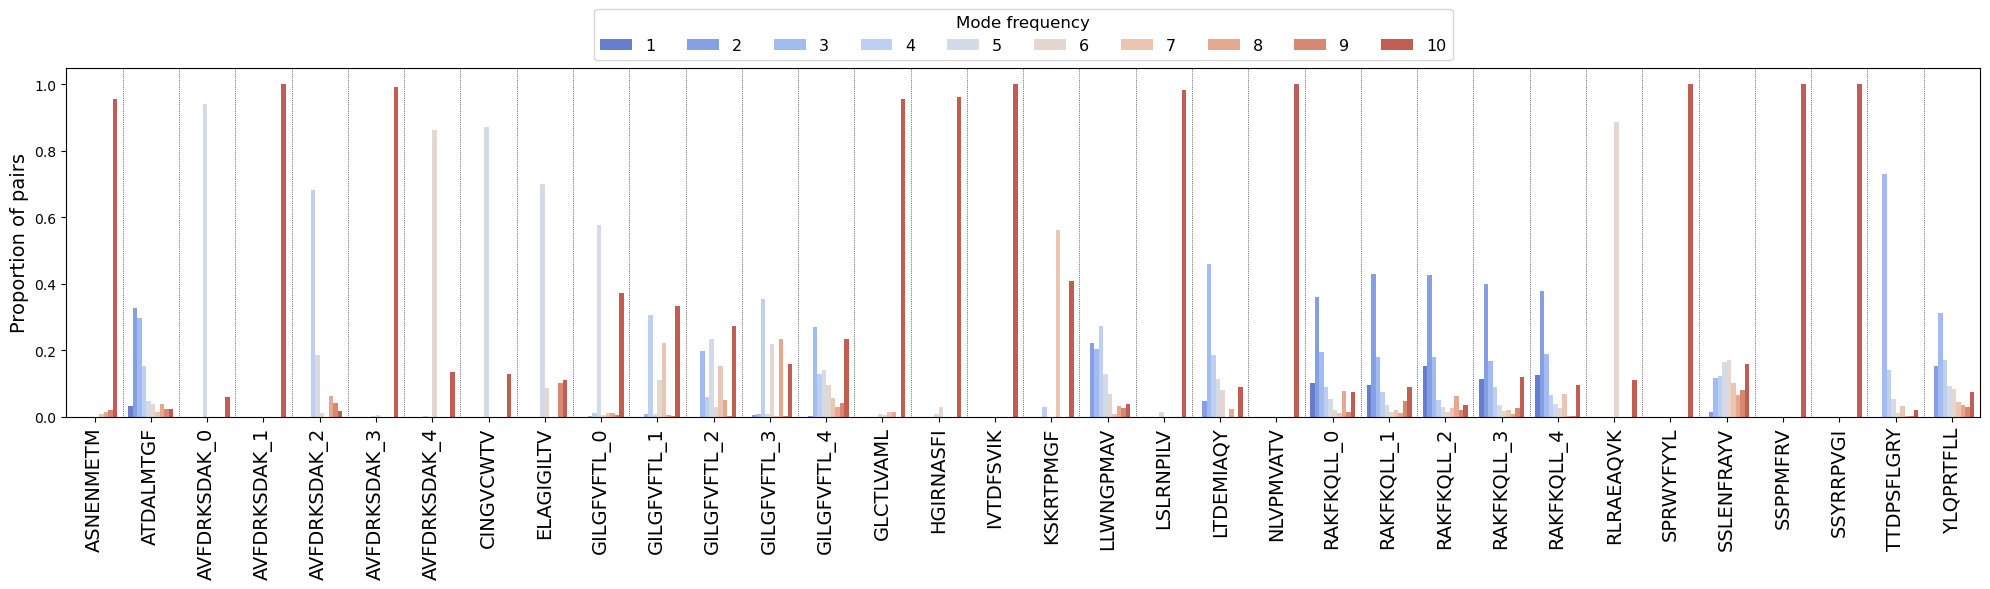

In [11]:
fig,ax=plt.subplots(figsize=(20,6))

sns.barplot(d.sort_values(by='epitope'),x='epitope',y='prop',hue='mode_freq',ax=ax, palette='coolwarm', linewidth=0)
for i in range(0, len(d['epitope'].unique())):
    ax.axvline(i+0.5, ls=':',c='k', lw=0.5)
ax.set_xlim(-0.5,len(d['epitope'].unique())-0.5)
plt.xticks(list(range(0,len(d['epitope'].unique()))), rotation=90, fontsize=14)
plt.xlabel('')
plt.ylabel('Proportion of pairs', fontdict={'size':14})
plt.legend(bbox_to_anchor=[0.5,1], loc='lower center', 
           title = 'Mode frequency', title_fontsize=12, fontsize=11.5, ncols=10)
plt.tight_layout()
plt.savefig(save_folder + 'all_epitopes_mode_stability_GAMI.png', bbox_inches='tight')
plt.show()

In [12]:
grouped_mode['epitope'].unique()

array(['ASNENMETM', 'ATDALMTGF', 'AVFDRKSDAK_0', 'AVFDRKSDAK_1',
       'AVFDRKSDAK_2', 'AVFDRKSDAK_3', 'AVFDRKSDAK_4', 'CINGVCWTV',
       'ELAGIGILTV', 'GILGFVFTL_0', 'GILGFVFTL_1', 'GILGFVFTL_2',
       'GILGFVFTL_3', 'GILGFVFTL_4', 'GLCTLVAML', 'HGIRNASFI',
       'IVTDFSVIK', 'KSKRTPMGF', 'LLWNGPMAV', 'LSLRNPILV', 'LTDEMIAQY',
       'NLVPMVATV', 'RAKFKQLL_0', 'RAKFKQLL_1', 'RAKFKQLL_2',
       'RAKFKQLL_3', 'RAKFKQLL_4', 'RLRAEAQVK', 'SPRWYFYYL', 'SSLENFRAYV',
       'SSPPMFRV', 'SSYRRPVGI', 'TTDPSFLGRY', 'YLQPRTFLL'], dtype=object)

In [13]:
top_10 = grouped_mode.loc[grouped_mode['mode_freq'] == 10]

In [14]:
stable = pd.merge(top_10.loc[top_10['correct'] == True, ['L', 'epitope','prop', 'counts']].rename(columns={'prop':'correct'}),
                  top_10.loc[top_10['correct'] == False, ['L', 'epitope','prop']].rename(columns={'prop':'wrong'}),
                  how = 'outer').fillna(0)
print(stable)
for ep in d['epitope'].unique():
    if (ep not in stable['epitope'].unique()) and (ep not in grouped_mode['epitope'].unique()):
        stable.loc[stable.shape[0]] = [0.6,ep,np.nan,np.nan,np.nan]
        stable.loc[stable.shape[0]] = [1.0,ep,np.nan,np.nan,np.nan]
    elif (ep not in stable['epitope'].unique()) and (ep in grouped_mode['epitope'].unique()):
        stable.loc[stable.shape[0]] = [0.6,ep,0,0,0]
        stable.loc[stable.shape[0]] = [1.0,ep,0,0,0]
    else:
        ee = stable.loc[stable['epitope'] == ep]
        if ee.shape[0] == 1:
            # print(ee)
            if ee['L'].iloc[0] == '0.6':
                stable.loc[stable.shape[0]] = [1.0,ep,0,0,0]
            elif ee['L'].iloc[0] == '1.0':
                stable.loc[stable.shape[0]] = [0.6,ep,0,0,0]


      L       epitope   correct  counts     wrong
0   0.6     ASNENMETM  0.373134    75.0  0.582090
1   1.0     ASNENMETM  0.029851     6.0  0.000000
2   0.6  AVFDRKSDAK_0  0.007143     5.0  0.051429
3   1.0  AVFDRKSDAK_0  0.003175     1.0  0.000000
4   0.6  AVFDRKSDAK_1  0.011429     8.0  0.988571
5   1.0  AVFDRKSDAK_1  0.003257     1.0  0.000000
6   0.6  AVFDRKSDAK_2  0.007143     5.0  0.010000
7   0.6  AVFDRKSDAK_3  0.018571    13.0  0.974286
8   1.0  AVFDRKSDAK_3  0.003215     1.0  0.000000
9   0.6  AVFDRKSDAK_4  0.007143     5.0  0.127143
10  1.0  AVFDRKSDAK_4  0.003289     1.0  0.000000
11  0.6     CINGVCWTV  0.008850     2.0  0.119469
12  0.6    ELAGIGILTV  0.018421     7.0  0.092105
13  1.0    ELAGIGILTV  0.010526     4.0  0.000000
14  0.6   GILGFVFTL_0  0.088571    62.0  0.282857
15  1.0   GILGFVFTL_0  0.003115     1.0  0.000000
16  0.6   GILGFVFTL_1  0.084286    59.0  0.250000
17  1.0   GILGFVFTL_1  0.008671     3.0  0.000000
18  0.6   GILGFVFTL_2  0.078571    55.0  0.194286


In [15]:
stable['L'] = stable['L'].astype('float')
stable = stable.sort_values(by = ['epitope','L'])
stable

,L,epitope,correct,counts,wrong
0,0.6,ASNENMETM,0.373134,75.0,0.582090
1,1.0,ASNENMETM,0.029851,6.0,0.000000
57,0.6,ATDALMTGF,0.000000,0.0,0.024000
58,1.0,ATDALMTGF,0.000000,0.0,0.000000
2,0.6,AVFDRKSDAK_0,0.007143,5.0,0.051429
...,...,...,...,...,...
53,1.0,SSYRRPVGI,0.039548,7.0,0.000000
54,0.6,TTDPSFLGRY,0.004132,1.0,0.016529
62,1.0,TTDPSFLGRY,0.000000,0.0,0.000000
55,0.6,YLQPRTFLL,0.033033,11.0,0.042042


In [16]:
from matplotlib.patches import Patch

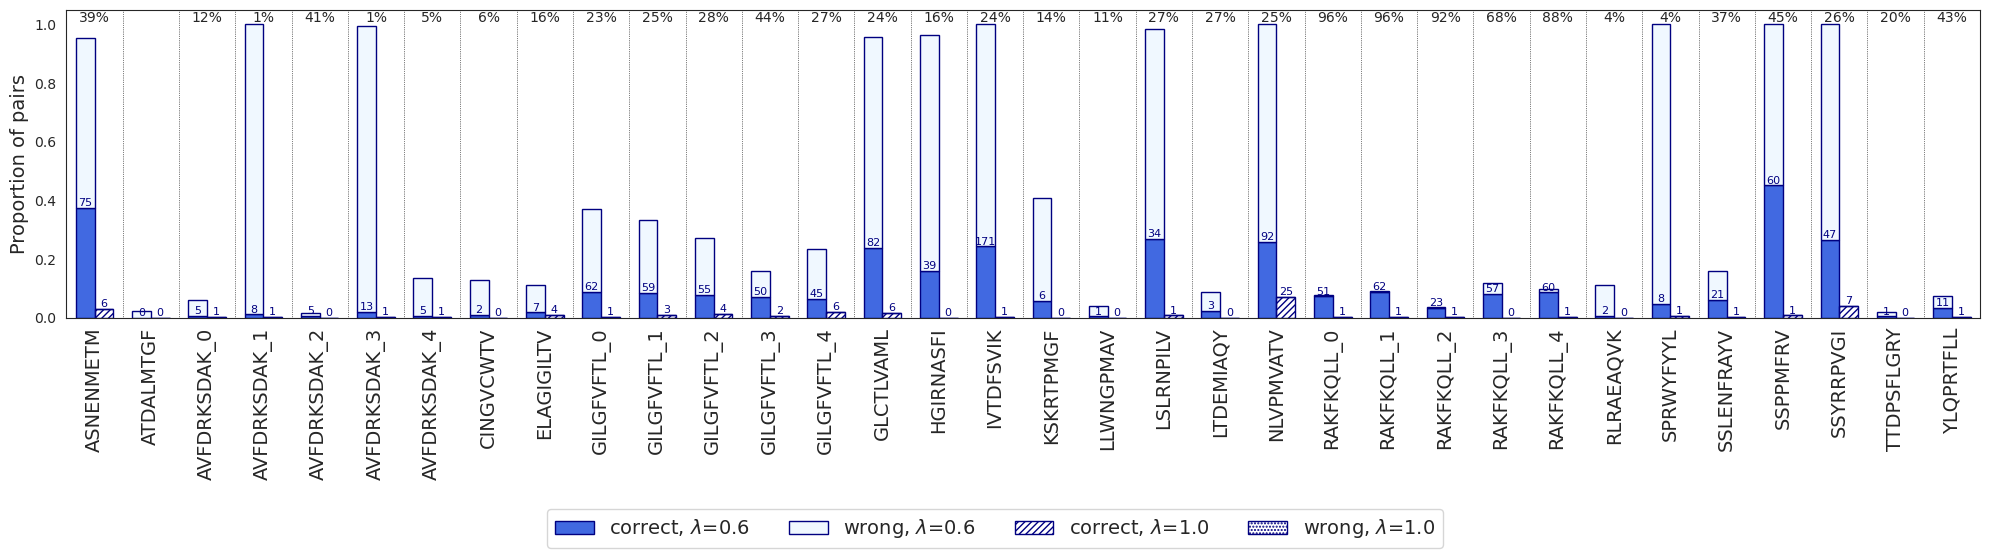

In [17]:
sns.set_style('white')

x_pos = [0,0.5, 1.5,2, 3,3.5, 4.5,5, 6,6.5, 7.5,8, 9,9.5, 10.5,11, 12,12.5, 13.5,14, 15,15.5, 16.5,17, 
         18,18.5, 19.5,20, 21,21.5, 22.5,23, 24,24.5, 25.5,26, 27,27.5, 28.5,29, 30,30.5, 31.5,32, 33,33.5, 34.5,35, 36,36.5,
         37.5,38, 39,39.5, 40.5,41, 42,42.5, 43.5,44, 45,45.5, 46.5,47, 48,48.5, 49.5,50]
# print(x_pos)
x_pos_c = np.array(x_pos)[np.array(list(range(0,len(x_pos),2)))]
x_pos_w = np.array(x_pos)[np.array(list(range(1,len(x_pos)+1,2)))]
x_pos1 = [0.25,1.75,3.25,4.75,6.25,7.75,9.25,10.75,12.25,13.75,15.25,16.75,18.25,19.75,21.25,22.75,24.25,25.75,27.25,
          28.75, 30.25, 31.75, 33.25, 34.75, 36.25, 37.75, 39.25, 40.75, 42.25, 43.75, 45.25, 46.75, 48.25, 49.75]

f,ax = plt.subplots(figsize=(20,5))
ax.bar(x = x_pos_c, height = stable.loc[stable['L'] == 0.6]['correct'], color='royalblue', width=0.5, edgecolor = 'navy')
ax.bar(x = x_pos_w, height = stable.loc[stable['L'] == 1]['correct'], fill=False, width=0.5, edgecolor = 'navy', hatch='/////')
ax.bar(x = x_pos_c, height = stable.loc[stable['L'] == 0.6]['wrong'], color='aliceblue', width=0.5, edgecolor = 'navy',
       bottom = stable.loc[stable['L'] == 0.6]['correct'])
ax.bar(x = x_pos_w, height = stable.loc[stable['L'] == 1]['wrong'], fill=False, width=0.5, edgecolor = 'navy', hatch='.....',
       bottom = stable.loc[stable['L'] == 1]['correct'])
ax.set_xticks(x_pos1, stable['epitope'].unique().tolist(), rotation=90, fontsize=14)

legend_handles = [Patch(facecolor='royalblue',edgecolor='navy',label=r'correct, $\lambda$=0.6'),
                  Patch(facecolor='aliceblue',edgecolor='navy',label=r'wrong, $\lambda$=0.6'),
                  Patch(facecolor='white',edgecolor='navy',label=r'correct, $\lambda$=1.0', hatch='/////'),
                  Patch(facecolor='white',edgecolor='navy',label=r'wrong, $\lambda$=1.0', hatch='.....')]
legend_labels = [r'correct, $\lambda$=0.6',r'wrong, $\lambda$=0.6',r'correct, $\lambda$=1.0',r'wrong, $\lambda$=1.0']

for x in [1,2.5,4,5.5,7,8.5,10,11.5,13,14.5,16,17.5,19,20.5,22,23.5,25,26.5,28,29.5,31,32.5,34,35.5,37,38.5,40,41.5,43,44.5,46,47.5,49]:
    ax.axvline(x, c='k', ls=':', lw = 0.5)
for i,c in enumerate(stable['counts'].tolist()):
    if stable.iloc[i]['L'] == 0.6:
        if c > 0:
            tpr = stable.iloc[i]['correct'] / (stable.iloc[i]['correct'] + stable.iloc[i]['wrong'])
            text = str(int(tpr*100)) + '%'
            ax.text((x_pos[i]+x_pos[i+1])/2, 1, text, horizontalalignment='center', verticalalignment='bottom', 
            fontsize=10)
    ax.text(x_pos[i], stable.iloc[i]['correct'], int(c), horizontalalignment='center', verticalalignment='bottom', 
            fontsize=8, color = 'navy')
ax.set_xlim(-0.5,max(x_pos)+0.5)
# ax.set_ylim(0,0.9)
plt.ylabel('Proportion of pairs', fontdict={'size':14})
f.legend(legend_handles, legend_labels, ncols=4, bbox_to_anchor = [0.5,-0.01], loc='upper center', fontsize=14)
plt.tight_layout()
plt.savefig(save_folder + 'all_epitopes_stable_choices_GAMI.png', bbox_inches='tight')
plt.show()